<a href="https://colab.research.google.com/github/salmaelgd/project_nlp/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Data exporting and giving a name to each column
file_path = '/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='latin-1', header=None)
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
print(data.head())

In [ ]:
data.target.value_counts()

In [ ]:
# Handling empty columns
missing_values = data.isnull().sum()
if any(missing_values > 0):
    print("Colonnes avec des valeurs manquantes :")
    print(missing_values[missing_values > 0])
else:
    print("Il n'y a pas de valeurs manquantes dans le dataset.")


In [ ]:
colonnes_a_supprimer = ['flag', 'ids', 'user']
data.drop(colonnes_a_supprimer, axis=1, inplace=True)

print(data.head())

In [ ]:
def extract_hashtags_from_column(df, column_name):
  hashtags = []
  for text in df[column_name]:
    for match in re.finditer(r"#\w+", text):
      hashtag = match.group(0)
      hashtags.append(hashtag)
  return hashtags


hashtags = extract_hashtags_from_column(data, "text")
print(hashtags)

In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Supprimer les liens
    text = re.sub(r'@[\w_]+', '', text) #supprimer les mentions
    text = re.sub(r'[^A-Za-z#\s]', '', text)  #supprimer les caracts spécifiques sauf #
    return text

data['text'] = data['text'].apply(clean_text)

print(data.head())


In [ ]:
# Lowercasing
data['text'] = data['text'].str.lower()
print(data.head())

In [ ]:
!pip install nltk

In [ ]:
# Removing stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

data['text'] = data['text'].apply(remove_stopwords)
print(data.head())


In [ ]:
# Lemmatization
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

data['text'] = data['text'].apply(lemmatize_text)
print(data.head())


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Concaténation de tous les textes pour construire un seul document
all_text = ' '.join(data['text'])

# Utilisation de CountVectorizer pour compter la fréquence des mots
count_vectorizer = CountVectorizer()
word_counts = count_vectorizer.fit_transform([all_text])

# Création d'un DataFrame avec les mots et leurs fréquences
word_freq_df = pd.DataFrame({'word': count_vectorizer.get_feature_names_out(), 'count': word_counts.toarray()[0]})

word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
print("Top 20 mots les plus fréquents :")
print(word_freq_df.head(20))

In [ ]:
# Liste de mots à exclure
mots_a_exclure = ['im', 'day', 'get', 'go', 'got', 'dont', 'work', 'today', 'going', 'time', 'back', 'one', 'know', 'really', 'want', 'wanna', 'gonna', 'cant', 'today', 'morning', 'night', 'tomorrow', 'amp', 'see', 'think', 'much', 'gon', 'na', 'new','well','still', 'need', 'home', 'last', 'make', 'mean', 'getting', 'nothing', 'another', 'first', 'girl', 'boy', 'twitter', 'didnt', 'yeah','ok', 'any', 'many', 'thats']

# Supprimer les mots spécifiques de la liste 'mots_a_exclure'
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in mots_a_exclure]))

# Afficher les premières lignes du DataFrame après la transformation
print(data.head())


In [ ]:
# Concaténation de tous les textes pour construire un seul document
all_text = ' '.join(data['text'])

# Utilisation de CountVectorizer pour compter la fréquence des mots
count_vectorizer = CountVectorizer()
word_counts = count_vectorizer.fit_transform([all_text])

# Création d'un DataFrame avec les mots et leurs fréquences
word_freq_df = pd.DataFrame({'word': count_vectorizer.get_feature_names_out(), 'count': word_counts.toarray()[0]})

word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
print("Top 20 mots les plus fréquents :")
print(word_freq_df.head(20))

Top 20 mots les plus fréquents :
          word  count
132809    good  89535
191668    like  79098
197257    love  67018
194731     lol  55218
345635  thanks  39570
241019      oh  38145
215335    miss  37696
112388    feel  35152
153981    hope  33925
135773   great  32861
160910     ill  31819
140349    haha  30339
390540    wish  29776
299706     sad  28589
66561     come  28288
123959     fun  27951
384129    week  27554
294459   right  27503
318118   sleep  27244
25987      bad  26782


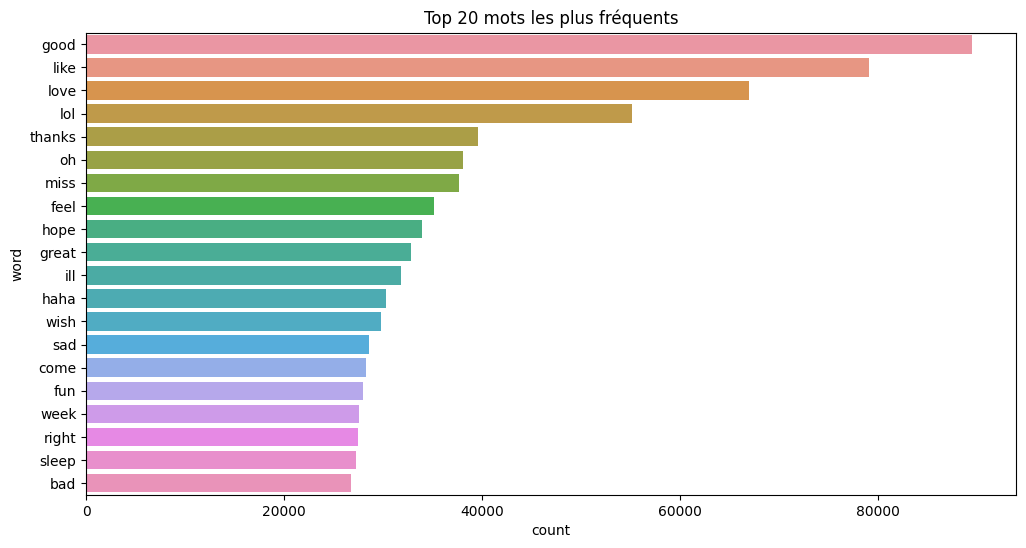

In [ ]:
# Visualisation avec un histogramme
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=word_freq_df.head(20))
plt.title('Top 20 mots les plus fréquents')
plt.show()

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

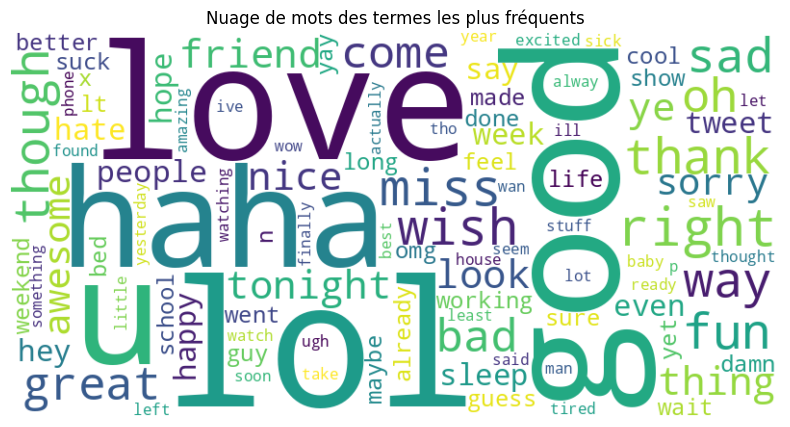

In [ ]:
# Création d'un nuage de mots
wordcloud = WordCloud(width=800, height=400, max_words=100, random_state=42, background_color='white').generate(all_text)

# Affichage du nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des termes les plus fréquents')
plt.show()

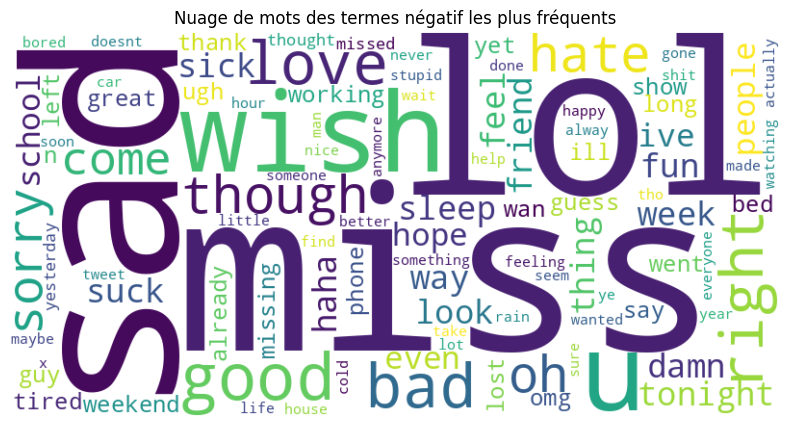

In [ ]:
# Création d'un nuage de mots -
all_words = " ".join([sentence for sentence in data['text'][data['target']==0]])

wordcloud = WordCloud(width=800, height=400, max_words=100, random_state=42, background_color='white').generate(all_words)

# Affichage du nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des termes négatif les plus fréquents')
plt.show()

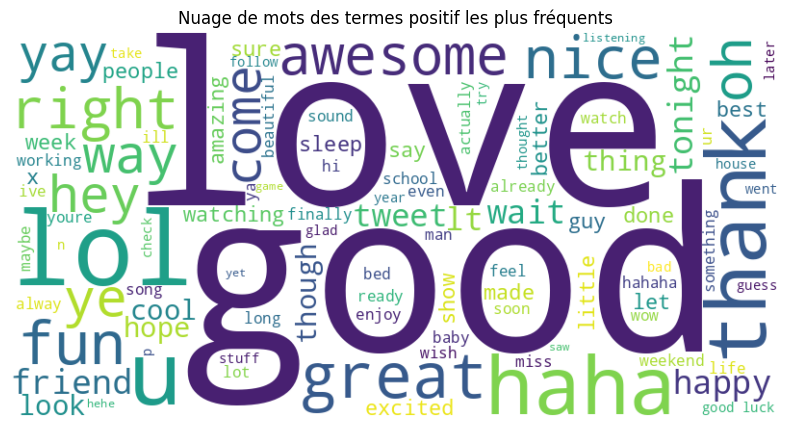

In [ ]:
# Création d'un nuage de mots -
all_words = " ".join([sentence for sentence in data['text'][data['target']==4]])

wordcloud = WordCloud(width=800, height=400, max_words=100, random_state=42, background_color='white').generate(all_words)

# Affichage du nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des termes positif les plus fréquents')
plt.show()

In [ ]:
def tokenize(text):
    words = word_tokenize(text)
    return words

data['tokens'] = data['text'].apply(tokenize)

print(data[['text', 'tokens']].head())

                                                text  \
0               awww bummer shoulda david carr third   
1  upset update facebook texting might cry result...   
2                 dived ball managed save rest bound   
3                    whole body feel itchy like fire   
4                                       behaving mad   

                                              tokens  
0        [awww, bummer, shoulda, david, carr, third]  
1  [upset, update, facebook, texting, might, cry,...  
2          [dived, ball, managed, save, rest, bound]  
3             [whole, body, feel, itchy, like, fire]  
4                                    [behaving, mad]  


In [ ]:
# Conversion de la colonne "date" en format datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extraction de l'année et du mois pour l'analyse temporelle
data['year_month'] = data['date'].dt.to_period('M')

# Grouper par mois et compter le nombre de tweets
monthly_tweet_counts = data.groupby('year_month').size()

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


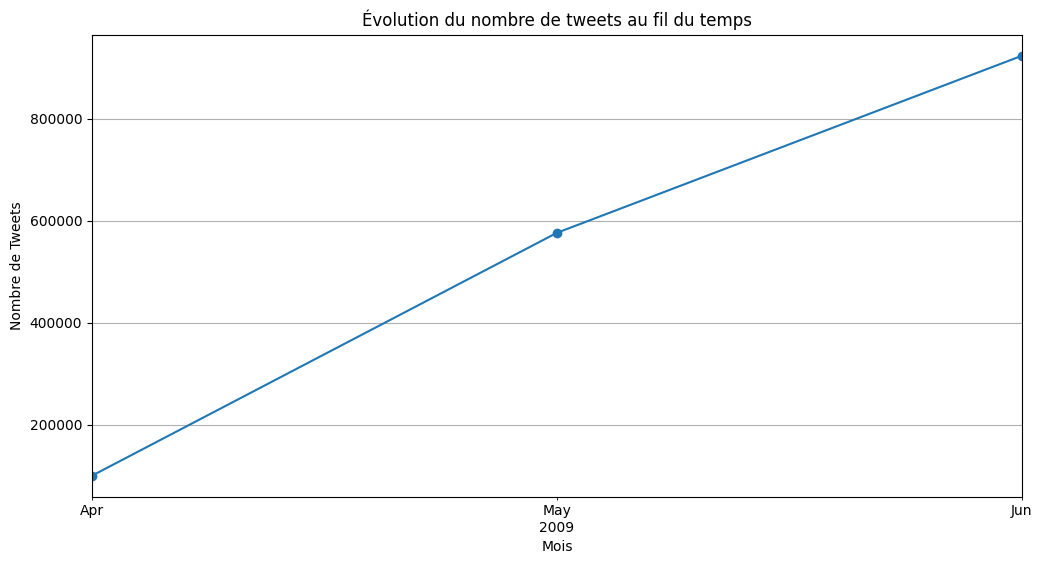

In [ ]:
# Tracer l'évolution du nombre de tweets au fil du temps
plt.figure(figsize=(12, 6))
monthly_tweet_counts.plot(marker='o', linestyle='-')
plt.title('Évolution du nombre de tweets au fil du temps')
plt.xlabel('Mois')
plt.ylabel('Nombre de Tweets')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Data splitting
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])
train_data, test_data = train_test_split(data, test_size=0.4, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)

print("Taille de l'ensemble d'entraînement :", len(train_data))
print("Taille de l'ensemble de validation :", len(val_data))
print("Taille de l'ensemble de test :", len(test_data))


Taille de l'ensemble d'entraînement : 960000
Taille de l'ensemble de validation : 320000
Taille de l'ensemble de test : 320000


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
# Calcul de la taille de la plus grande séquence et du nombre total de mots
max_sequence_length = data['tokens'].apply(len).max()
num_total_words = len(set(word for sublist in data['tokens'] for word in sublist))

print("Taille de la plus grande séquence :", max_sequence_length)
print("Nombre total de mots dans le vocabulaire :", num_total_words)

Taille de la plus grande séquence : 65
Nombre total de mots dans le vocabulaire : 408437


In [ ]:
# CNN model
max_words = num_total_words
max_len = max_sequence_length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['text'])

X_train = tokenizer.texts_to_sequences(train_data['text'])
X_val = tokenizer.texts_to_sequences(val_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

# Add padding to sequences
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')


# Convertir les variables cibles en encodage binaire (0 ou 1)
y_train = train_data['target'].replace({0: 0, 4: 1})
y_val = val_data['target'].replace({0: 0, 4: 1})
y_test = test_data['target'].replace({0: 0, 4: 1})



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Flatten, Dense

embedding_dim = 150

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(150, 5, padding='same', activation='relu'))
#model.add(GlobalMaxPooling1D())
model.add(Conv1D(150, 5, padding='same', activation='relu'))
#model.add(GlobalMaxPooling1D())
model.add(Conv1D(150, 5, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(250, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras import metrics
from keras import backend as K

def f1_score(y_true, y_pred):
    # Fonction pour calculer la métrique F1-score
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

# Compiler le modèle avec la métrique F1-score
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', metrics.Precision(), metrics.Recall(), f1_score]
)


In [ ]:
# Model training
history = model.fit(X_train,
                    y_train, epochs=25,
                    batch_size=250,
                    validation_data=(X_val, y_val))


Epoch 1/25
3840/3840 [==============================] - 167s 41ms/step - loss: 0.4829 - accuracy: 0.7634 - precision: 0.7593 - recall: 0.7710 - f1_score: 0.7636 - val_loss: 0.4700 - val_accuracy: 0.7763 - val_precision: 0.7825 - val_recall: 0.7663 - val_f1_score: 0.7736
Epoch 2/25
3840/3840 [==============================] - 131s 34ms/step - loss: 0.3997 - accuracy: 0.8172 - precision: 0.8194 - recall: 0.8134 - f1_score: 0.8157 - val_loss: 0.4867 - val_accuracy: 0.7693 - val_precision: 0.7628 - val_recall: 0.7823 - val_f1_score: 0.7718
Epoch 3/25
3840/3840 [==============================] - 130s 34ms/step - loss: 0.3115 - accuracy: 0.8619 - precision: 0.8649 - recall: 0.8576 - f1_score: 0.8608 - val_loss: 0.5358 - val_accuracy: 0.7618 - val_precision: 0.7657 - val_recall: 0.7554 - val_f1_score: 0.7598
Epoch 4/25
3840/3840 [==============================] - 126s 33ms/step - loss: 0.2451 - accuracy: 0.8913 - precision: 0.8942 - recall: 0.8876 - f1_score: 0.8904 - val_loss: 0.6564 - val_a

In [ ]:
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(X_test, y_test)

# Affichez les résultats
print("Loss:", test_loss)
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)


10000/10000 [==============================] - 43s 4ms/step - loss: 2.1984 - accuracy: 0.7293 - precision: 0.7310 - recall: 0.7260 - f1_score: 0.7219
Loss: 2.1984198093414307
Accuracy: 0.7293375134468079
Precision: 0.731013834476471
Recall: 0.7260357141494751
F1-score: 0.7219048142433167


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(X_val)

# Convertir les probabilités en classes binaires (0 ou 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Convertir les vraies valeurs en classes binaires (0 ou 1)
y_val_binary = val_data['target'].replace({0: 0, 4: 1})

# Obtenir la matrice de confusion
conf_matrix = confusion_matrix(y_val_binary, y_pred_binary)
print("Matrice de Confusion:")
print(conf_matrix)

# Obtenir le rapport de classification
class_report = classification_report(y_val_binary, y_pred_binary)
print("Rapport de Classification:")
print(class_report)

10000/10000 [==============================] - 20s 2ms/step
Matrice de Confusion:
[[117342  42448]
 [ 44048 116162]]
Rapport de Classification:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73    159790
           1       0.73      0.73      0.73    160210

    accuracy                           0.73    320000
   macro avg       0.73      0.73      0.73    320000
weighted avg       0.73      0.73      0.73    320000



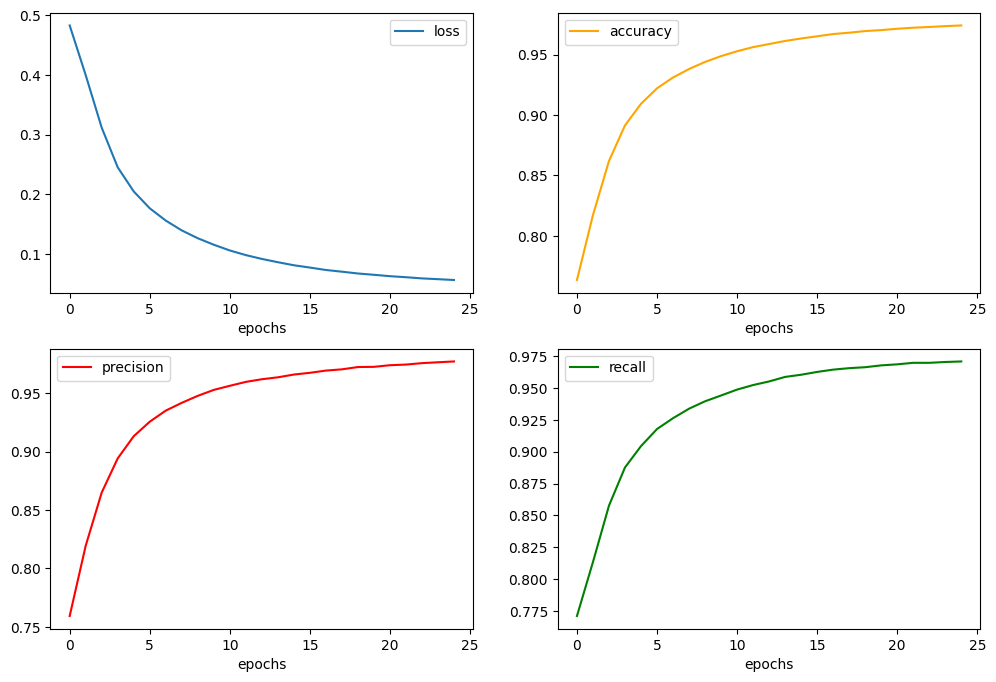

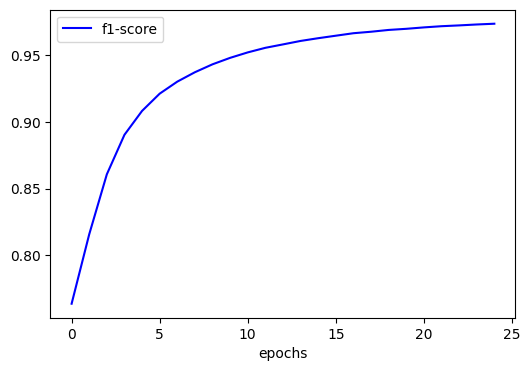

In [ ]:
import matplotlib.pyplot as plt

# Affichage du loss et de l'accuracy
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], color='orange')
plt.xlabel('epochs')
plt.legend(['accuracy'])

plt.subplot(2, 2, 3)
plt.plot(history.history['precision'], color='red')
plt.xlabel('epochs')
plt.legend(['precision'])

plt.subplot(2, 2, 4)
plt.plot(history.history['recall'], color='green')
plt.xlabel('epochs')
plt.legend(['recall'])

# Ajout de la courbe f1-score
plt.figure(figsize=(6, 4))

plt.plot(history.history['f1_score'], color='blue')
plt.xlabel('epochs')
plt.legend(['f1-score'])

plt.show()
